In [1]:
##IMPORT DELLE LIBRERIE NECESSARIE : 
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA"]

## mi scarico i dati da yf, prendendo come periodo 5 anni dal 2020 al 2025 usando come riferiemtno il prezzo di chisura: 

data = yf.download(tickers,start = "2020-01-01",end = "2025-01-01")["Close"]


/tmp/ipykernel_39377/1860520567.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers,start = "2020-01-01",end = "2025-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed


In [17]:
## ora generiamo  i portafogi : 
#devo crearmi la struttura per i portafogli, 
# uso una lista vuota inizialmente : 
portafogli = []

for i in range(100):

        ## calcolo i rendimenti giornalieri dei singoli titoli : 
        returns = data.pct_change().dropna() 

        #rendimenti annualizzati dei singoli titoli : 
        mean_returns = returns.mean() * 252

        ## numeri casuali
        weights = np.random.random(len(tickers))  
        # normalizzati somma = 1  
        weights /= np.sum(weights)                  

        MUp = np.dot(weights, mean_returns)
        cov_matrix = returns.cov() * 252
        DEVp = np.sqrt(weights.T @ cov_matrix @ weights)

        lista_temp = [MUp,DEVp,weights]
        #aggiungo la lista temporanea con i valori appena calcolati del singolo portafoglio alla lista dei portafogli 
        portafogli.append(lista_temp)


print(portafogli)


[[0.39792208201860524, 0.3408992861626403, array([0.22884134, 0.21910766, 0.18601524, 0.09047671, 0.27555906])], [0.44821905926802724, 0.370303043607143, array([0.30837332, 0.06601995, 0.144166  , 0.11836888, 0.36307185])], [0.45807061703021884, 0.3767527083279675, array([0.29687708, 0.0193372 , 0.17334098, 0.12886693, 0.38157781])], [0.28931827706916835, 0.29676716277961895, array([0.25692482, 0.37059638, 0.28240839, 0.028661  , 0.06140941])], [0.3916400205293776, 0.34050224924751954, array([0.37019511, 0.28483636, 0.00575799, 0.08415726, 0.25505328])], [0.3142873140986626, 0.2941793438283891, array([0.33967042, 0.11673244, 0.36101876, 0.08952692, 0.09305145])], [0.32570200190146203, 0.30112878080004774, array([0.29101899, 0.23139271, 0.26184815, 0.08986064, 0.12587951])], [0.3032043248878747, 0.2911522809354007, array([0.32171827, 0.18429357, 0.29101544, 0.12655872, 0.076414  ])], [0.4187025734497217, 0.34963263299644803, array([0.23753565, 0.0787056 , 0.26893442, 0.10517151, 0.30965

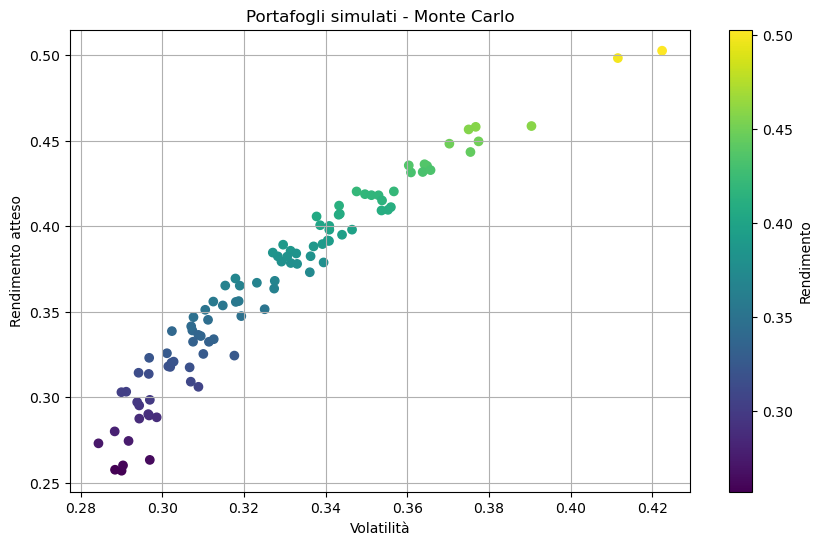

In [18]:
returns = [p[0] for p in portafogli]
volatility = [p[1] for p in portafogli]

plt.figure(figsize=(10,6))
plt.scatter(volatility, returns, c=returns, cmap='viridis', marker='o')
plt.xlabel('Volatilità')
plt.ylabel('Rendimento atteso')
plt.title('Portafogli simulati - Monte Carlo')
plt.colorbar(label='Rendimento')
plt.grid(True)
plt.show()

